# Simpson's rule

Let $\{x_{n}\}$ be a partition of $[a,b]$ such that $a=x_{0}<x_{1}<\cdots <x_{N-1}<x_{N}=b$ and has an even number of subintervals with length of $h = (b-a)/N$.

\begin{align*}
\int _{a}^{b}f(x)\,dx\approx \frac {h}{3}\sum _{n=2}^{N}\left(f(x_{n-2}) + f(x_{n-1}) + f(x_{n})\right), \qquad N\text{ is an even number}.
\end{align*}

Furthermore, we can implement this algorithm in Python.

In [1]:
def Simps(f, a, b, N):
    '''
    f : single variable function f
    a , b : Interval of integration [a,b]
    N : Number of subintervals of [a,b]
    '''
     
    # discretizing [a,b] into N subintervals
    # N must be an even integer
    
    if N % 2 == 1:
        raise ValueError("N is not an even integer.")
    # the increment h
    h = (b-a)/N
    # discretizing [a,b] into N subintervals
    x = np.linspace(a, b, N+1)
    
    fn = f(x)
    S = (h/3) * np.sum(fn[0:-1:2] + 4*fn[1::2] + fn[2::2])
    return S

<font color='Blue'><b>Example</b></font>: Apply the Simpson's rule on
\begin{align*}
\int_{0}^{\pi/4} \cos^2(x)\, dx.
\end{align*}

We have,

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

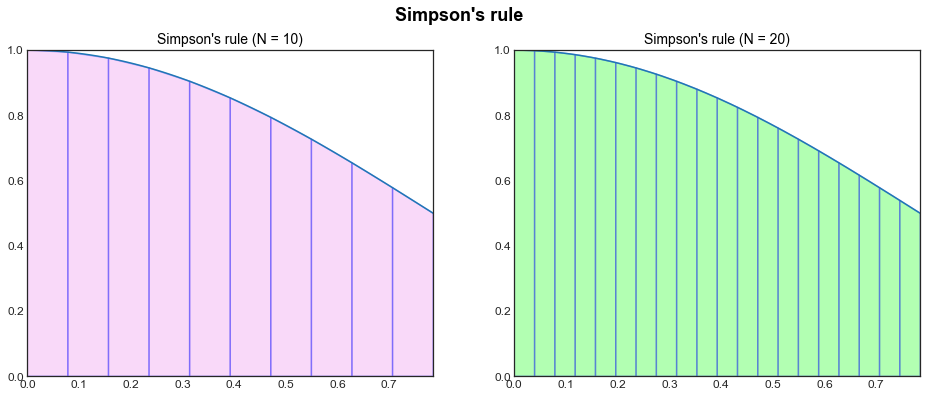

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from NA_Notes import SimpsPlots
from matplotlib.font_manager import FontProperties
from IPython.display import display, Latex

f = lambda x : np.cos(x)**2
a =0
b= np.pi/4
N = [10, 20]
#
fig, ax = plt.subplots(nrows=1, ncols=len(N), figsize=(16, 6))
ax = ax.ravel()
Colors = ['Violet', 'Lime']
font = FontProperties()
font.set_weight('bold')
_ = fig.suptitle("""Simpson's rule""", fontproperties=font, fontsize = 18)
for i in range(len(ax)):
    SimpsPlots(f= f, a = a, b= b, N = N[i], ax = ax[i], CL = Colors[i])
    Int_trapz = Simps(f= f, a = a, b= b, N = N[i])
    display(Latex('''\\frac {h}{3}\\sum _{n=2}^{%i} \\left(f(x_{n-2})+f(x_{n-1})+f(x_{n})\\right) = %.4e''' % (N[i], Int_trapz)))
    del Int_trapz
del i

## Error Estimation

\begin{align*}
E_{h} = \left|\int _{a}^{b}f(x)\,dx - \frac {h}{3}\sum _{n=2}^{N}\left(f(x_{n-2}) + f(x_{n-1}) + f(x_{n})\right)\right|
 = \frac {(b-a)}{180}h^{4} f^{(4)}(\xi),
 \qquad \text{for some }\xi \in [a, b].
\end{align*}

<font color='Blue'><b>Example</b></font>: Consider evaluating
\begin{align*}
\int_{0}^{2} \frac{1}{1+x}\, dx.
\end{align*}
We know that
$$\int_{0}^{2} \frac{1}{1+x}\, dx = \ln(x+1) \Big|_{0}^{2} = \ln(3).$$

Let's assume that we are interested in evaluing this integral using the Simpson's rule. For instance, to ensure that the error is less than $5 \times 10^{-6}$, we have,

\begin{align*}
f(x) = \frac{1}{x+1} \quad \Rightarrow \quad f'(x) = -\frac{1}{(x + 1)^2} \quad \Rightarrow \quad f''(x) = \frac{2}{(x + 1)^3} .
\end{align*}

In [3]:
E = 5e-6
f = lambda x : 1/(x+1)
f4 =  lambda x : 24/((x+1)**5)
Exact = np.log(3)
a =0
b= 2
x = np.linspace(a, b)
M = max(abs(f4(x)))
display(Latex('''\\max_{%.2f \leq x \leq %.2f}|f^{(4)}(x)| = %.2f''' % (a, b, M)))

<IPython.core.display.Latex object>

Thus, it follows from solving the following inequality that

In [4]:
display(Latex('''\\frac{b -a}{180}h^4 \\max_{a \leq x \leq b}|f^{(4)}(x)| \leq %.2e''' % E))
h = float('%.0e' % np.power(E/(((b-a)/180)*M), 1/4))
display(Latex('''h = %.2e''' % h))
N = int(np.ceil((b-a)/h))
if (N%2 != 0):
    N +=1
display(Latex('''N = %i''' % N))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Therefore,

In [5]:
T = Simps(f, a, b, N)
display(Latex('''E_{h} = %.2e''' % np.abs(Exact - T)))

<IPython.core.display.Latex object>

Moreover, to see the order of accuracy of this method, we can consider the following test.

In [7]:
import pandas as pd
h = [2**(-i) for i in range(3, 10)]

Cols = ['h', 'N', 'Eh']
Table = pd.DataFrame(np.zeros([len(h), len(Cols)], dtype = float), columns=Cols)
Table['h'] = h
Table['N'] = ((b-a)/Table['h']).astype(int)

for i in range(Table.shape[0]):
    Table.loc[i, 'Eh'] = np.abs(Simps(f, a, b, Table['N'][i]) - Exact)
    
display(Table.style.set_properties(subset=['h', 'N'], **{'background-color': 'PaleGreen', 'color': 'Black',
       'border-color': 'DarkGreen'}).format(dict(zip(Table.columns.tolist()[-3:], 3*["{:.4e}"]))))

,h,N,Eh
0,1.2500e-01,1.6000e+01,7.7540e-06
1,6.2500e-02,3.2000e+01,4.9770e-07
2,3.1250e-02,6.4000e+01,3.1323e-08
3,1.5625e-02,1.2800e+02,1.9611e-09
4,7.8125e-03,2.5600e+02,1.2263e-10
5,3.9062e-03,5.1200e+02,7.6648e-12
6,1.9531e-03,1.0240e+03,4.7895e-13


In [9]:
# This part is used for producing tables and figures
import sys
sys.path.insert(0,'..')
import hd_tools as hd
from bokeh.plotting import show

Loading BokehJS ...

In [11]:
hd.derivative_AccuracyOrder(vecs = [Table['Eh'].values],
                            labels = ["""Simpson's rule"""],
                            xlabel = r"$$i$$",
                            ylabel = r"$$\ln \left( E_{h_{i}} / E_{h_{i-1}}  \right)$$",
                            title = """Order of accuracy: Simpson's rule""",
                            legend_orientation = 'horizontal')

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
1. Zarowski, Christopher J. An introduction to numerical analysis for electrical and computer engineers. John Wiley & Sons, 2004.
1. [Numerical integration Wikipedia page](https://en.wikipedia.org/wiki/Numerical_integration)
1. [Simpson's rule Wikipedia page](https://en.wikipedia.org/wiki/Simpson%27s_rule)
***